In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import pairwise_distances
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBRegressor
from sklearn.svm import SVR
import scipy.stats as stats
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import random
from sklearn.linear_model import LinearRegression
import os
import warnings
import networkx as nx
!pip install econml
from econml.dml import CausalForestDML

np.random.seed(42)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 22.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 532.9/532.9 kB 18.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 237.3/237.3 kB 14.0 MB/s eta 0:00:00
  Attempting uninstall: slicer
    Found existing installation: slicer 0.0.8
    Uninstalling slicer-0.0.8:
      Successfully uninstalled slicer-0.0.8
  Attempting uninstall: shap
    Found existing installation: shap 0.46.0
    Uninstalling shap-0.46.0:
      Successfully uninstalled shap-0.46.0


In [ ]:
from google.colab import files

uploaded = files.upload()

Saving StudentsPerformance_with_headers.csv to StudentsPerformance_with_headers.csv


In [ ]:
file_path = 'StudentsPerformance_with_headers.csv'
data = pd.read_csv(file_path)
data.head()

,STUDENT ID,Student Age,Sex,Graduated high-school type,Scholarship type,Additional work,Regular artistic or sports activity,Do you have a partner,Total salary if available,Transportation to the university,...,Preparation to midterm exams 1,Preparation to midterm exams 2,Taking notes in classes,Listening in classes,Discussion improves my interest and success in the course,Flip-classroom,Cumulative grade point average in the last semester (/4.00),Expected Cumulative grade point average in the graduation (/4.00),COURSE ID,GRADE
0,STUDENT1,2,2,3,3,1,2,2,1,1,...,1,1,3,2,1,2,1,1,1,1
1,STUDENT2,2,2,3,3,1,2,2,1,1,...,1,1,3,2,3,2,2,3,1,1
2,STUDENT3,2,2,2,3,2,2,2,2,4,...,1,1,2,2,1,1,2,2,1,1
3,STUDENT4,1,1,1,3,1,2,1,2,1,...,1,2,3,2,2,1,3,2,1,1
4,STUDENT5,2,2,1,3,2,2,1,3,1,...,2,1,2,2,2,1,2,2,1,1


In [ ]:
analysis_data = data.copy(deep=True)

In [ ]:
def categorize_student_data(df):
    # Mapping for Student Age
    age_mapping = {
        1: '18-21',
        2: '22-25',
        3: 'Above 26'
    }

    # Mapping for Graduated high-school type
    high_school_mapping = {
        1: 'Private',
        2: 'State',
        3: 'Other'
    }

    # Mapping for Scholarship type
    scholarship_mapping = {
        1: 'None',
        2: '25%',
        3: '50%',
        4: '75%',
        5: 'Full'
    }
    work_mapping = {1: 'Yes', 2: 'No'}
    sex_mapping = {1: 'Female', 2: 'Male'}
    salary_mapping = {
        1: 'USD 135-200', 2: 'USD 201-270', 3: 'USD 271-340', 4: 'USD 341-410', 5: 'Above 410'
    }
    accommodation_mapping = {
        1: 'Rental', 2: 'Dormitory', 3: 'With family', 4: 'Other'
    }
    study_hours_mapping = {
        1: 'None', 2: '<5 hours', 3: '6-10 hours', 4: '11-20 hours', 5: 'More than 20 hours'
    }
    attendance_mapping = {
        1: 'Always', 2: 'Sometimes', 3: 'Never'
    }
    prep_midterm1_mapping = {
        1: 'Alone', 2: 'With friends', 3: 'Not applicable'
    }
    prep_midterm2_mapping = {
        1: 'Closest to exam date', 2: 'Regularly during semester', 3: 'Never'
    }
    notes_mapping = {
        1: 'Never', 2: 'Sometimes', 3: 'Always'
    }
    listening_mapping = {
        1: 'Never', 2: 'Sometimes', 3: 'Always'
    }
    gpa_mapping = {
        1: '<2.00', 2: '2.00-2.49', 3: '2.50-2.99', 4: '3.00-3.49', 5: 'Above 3.49'
    }
    grade_mapping = {
        0: 'Fail', 1: 'DD', 2: 'DC', 3: 'CC', 4: 'CB', 5: 'BB', 6: 'BA', 7: 'AA'
    }


    # Applying the mappings
    df['Student Age'] = df['Student Age'].map(age_mapping)
    df['Sex'] = df['Sex'].map(sex_mapping)
    df['Graduated high-school type'] = df['Graduated high-school type'].map(high_school_mapping)
    df['Scholarship type'] = df['Scholarship type'].map(scholarship_mapping)
    df['Additional work'] = df['Additional work'].map(work_mapping)
    df['Total salary if available'] = df['Total salary if available'].map(salary_mapping)
    df['Accommodation type in Cyprus'] = df['Accommodation type in Cyprus'].map(accommodation_mapping)
    df['Weekly study hours'] = df['Weekly study hours'].map(study_hours_mapping)
    df['Attendance to classes'] = df['Attendance to classes'].map(attendance_mapping)
    df['Preparation to midterm exams 1'] = df['Preparation to midterm exams 1'].map(prep_midterm1_mapping)
    df['Preparation to midterm exams 2'] = df['Preparation to midterm exams 2'].map(prep_midterm2_mapping)
    df['Taking notes in classes'] = df['Taking notes in classes'].map(notes_mapping)
    df['Listening in classes'] = df['Listening in classes'].map(listening_mapping)
    df['Cumulative grade point average in the last semester (/4.00)'] = df['Cumulative grade point average in the last semester (/4.00)'].map(gpa_mapping)
    df['Expected Cumulative grade point average in the graduation (/4.00)'] = df['Expected Cumulative grade point average in the graduation (/4.00)'].map(gpa_mapping)
    df['GRADE'] = df['GRADE'].map(grade_mapping)

    return df

def map_grade_to_scale(df):
    """
    Map the last grade to the 0-100 scale based on the following mapping:

    Fail: 0-59
    DD: 60-64
    DC: 65-69
    CC: 70-74
    CB: 75-79
    BB: 80-84
    BA: 85-89
    AA: 90-100

    Map GPA to a 0-100 scale based on the following mapping:

    <2.00 -> 0-49
    2.00-2.49 -> 50-59
    2.50-2.99 -> 60-69
    3.00-3.49 -> 70-79
    Above 3.49 -> 80-100
    """

    # Mapping of grades to numerical ranges
    grade_mapping = {
        'Fail': '0-59',
        'DD': '60-64',
        'DC': '65-69',
        'CC': '70-74',
        'CB': '75-79',
        'BB': '80-84',
        'BA': '85-89',
        'AA': '90-100'
    }

    gpa_mapping = {
        '<2.00': '0-49',    # <2.00
        '2.00-2.49': '50-59',  # 2.00-2.49
        '2.50-2.99': '60-69',  # 2.50-2.99
        '3.00-3.49': '70-79',  # 3.00-3.49
        'Above 3.49': '80-100'   # Above 3.49
    }

    # Apply the mapping to convert grades to the middle of the corresponding scale
    df['Cumulative grade point average in the last semester (/4.00)'] = df['Cumulative grade point average in the last semester (/4.00)'].map(gpa_mapping)
    df['Expected Cumulative grade point average in the graduation (/4.00)'] = df['Expected Cumulative grade point average in the graduation (/4.00)'].map(gpa_mapping)
    df['GRADE'] = df['GRADE'].map(grade_mapping)

    return df


In [ ]:
analysis_data = categorize_student_data(analysis_data)
analysis_data = map_grade_to_scale(analysis_data)
analysis_data.head()

,STUDENT ID,Student Age,Sex,Graduated high-school type,Scholarship type,Additional work,Regular artistic or sports activity,Do you have a partner,Total salary if available,Transportation to the university,...,Preparation to midterm exams 1,Preparation to midterm exams 2,Taking notes in classes,Listening in classes,Discussion improves my interest and success in the course,Flip-classroom,Cumulative grade point average in the last semester (/4.00),Expected Cumulative grade point average in the graduation (/4.00),COURSE ID,GRADE
0,STUDENT1,22-25,Male,Other,50%,Yes,2,2,USD 135-200,1,...,Alone,Closest to exam date,Always,Sometimes,1,2,0-49,0-49,1,60-64
1,STUDENT2,22-25,Male,Other,50%,Yes,2,2,USD 135-200,1,...,Alone,Closest to exam date,Always,Sometimes,3,2,50-59,60-69,1,60-64
2,STUDENT3,22-25,Male,State,50%,No,2,2,USD 201-270,4,...,Alone,Closest to exam date,Sometimes,Sometimes,1,1,50-59,50-59,1,60-64
3,STUDENT4,18-21,Female,Private,50%,Yes,2,1,USD 201-270,1,...,Alone,Regularly during semester,Always,Sometimes,2,1,60-69,50-59,1,60-64
4,STUDENT5,22-25,Male,Private,50%,No,2,1,USD 271-340,1,...,With friends,Closest to exam date,Sometimes,Sometimes,2,1,50-59,50-59,1,60-64


In [ ]:
def visualize_distributions(df, column_list):
    """
    Plot the distributions of specified columns in a grid with 5 columns per row.
    """
    num_columns = len(column_list)
    num_rows = (num_columns + 4) // 5  # Calculate the number of rows needed

    fig, axes = plt.subplots(num_rows, 5, figsize=(20, 4 * num_rows))  # Adjust size for the grid

    # Flatten axes array for easier iteration if there are multiple rows
    axes = axes.flatten()


    title_mappings = {
        'Cumulative grade point average in the last semester (/4.00)': 'Cumulative GPA (Last Semester)',
        'Expected Cumulative grade point average in the graduation (/4.00)': 'Expected Cumulative GPA (Graduation)'
    }

    xlabel_mappings = {
        'Cumulative grade point average in the last semester (/4.00)': 'Cumulative GPA (Last Semester)',
        'Expected Cumulative grade point average in the graduation (/4.00)': 'Expected GPA (Graduation)'
    }

    # Define the correct order for the grade categories
    grade_order = ['0-59', '60-64', '65-69', '70-74', '75-79', '80-84', '85-89', '90-100']
    age_order = ['18-21','22-25','Above 26']
    scholarship_order = ['None', '25%', '50%','75%','Full']
    study_hours_order = ['None', '<5 hours', '6-10 hours', '11-20 hours', 'More than 20 hours']


    for i, column in enumerate(column_list):
        # Ensure the columns is ordered correctly
        if column == 'GRADE':
            df['GRADE'] = pd.Categorical(df['GRADE'], categories=grade_order, ordered=True)
        if column == 'Student Age':
            df['Student Age'] = pd.Categorical(df['Student Age'], categories=age_order, ordered=True)
        if column == 'Scholarship type':
            df['Scholarship type'] = pd.Categorical(df['Scholarship type'], categories=scholarship_order, ordered=True)
        if column == 'Weekly study hours':
            df['Weekly study hours'] = pd.Categorical(df['Weekly study hours'], categories=study_hours_order, ordered=True)

        sns.histplot(df[column], kde=True, ax=axes[i])


        title = title_mappings.get(column, f'Distribution of {column}')
        axes[i].set_title(title, fontsize=10)


        xlabel = xlabel_mappings.get(column, column)
        axes[i].set_xlabel(xlabel, fontsize=9)


        axes[i].tick_params(axis='x', rotation=45)

    # Remove unused subplots if any
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    # Adjust layout with more space for titles and axis labels
    plt.tight_layout(pad=3.0)  # Adjust padding between subplots
    plt.subplots_adjust(hspace=1, wspace=0.3)  # Add more space between rows and columns
    plt.show()


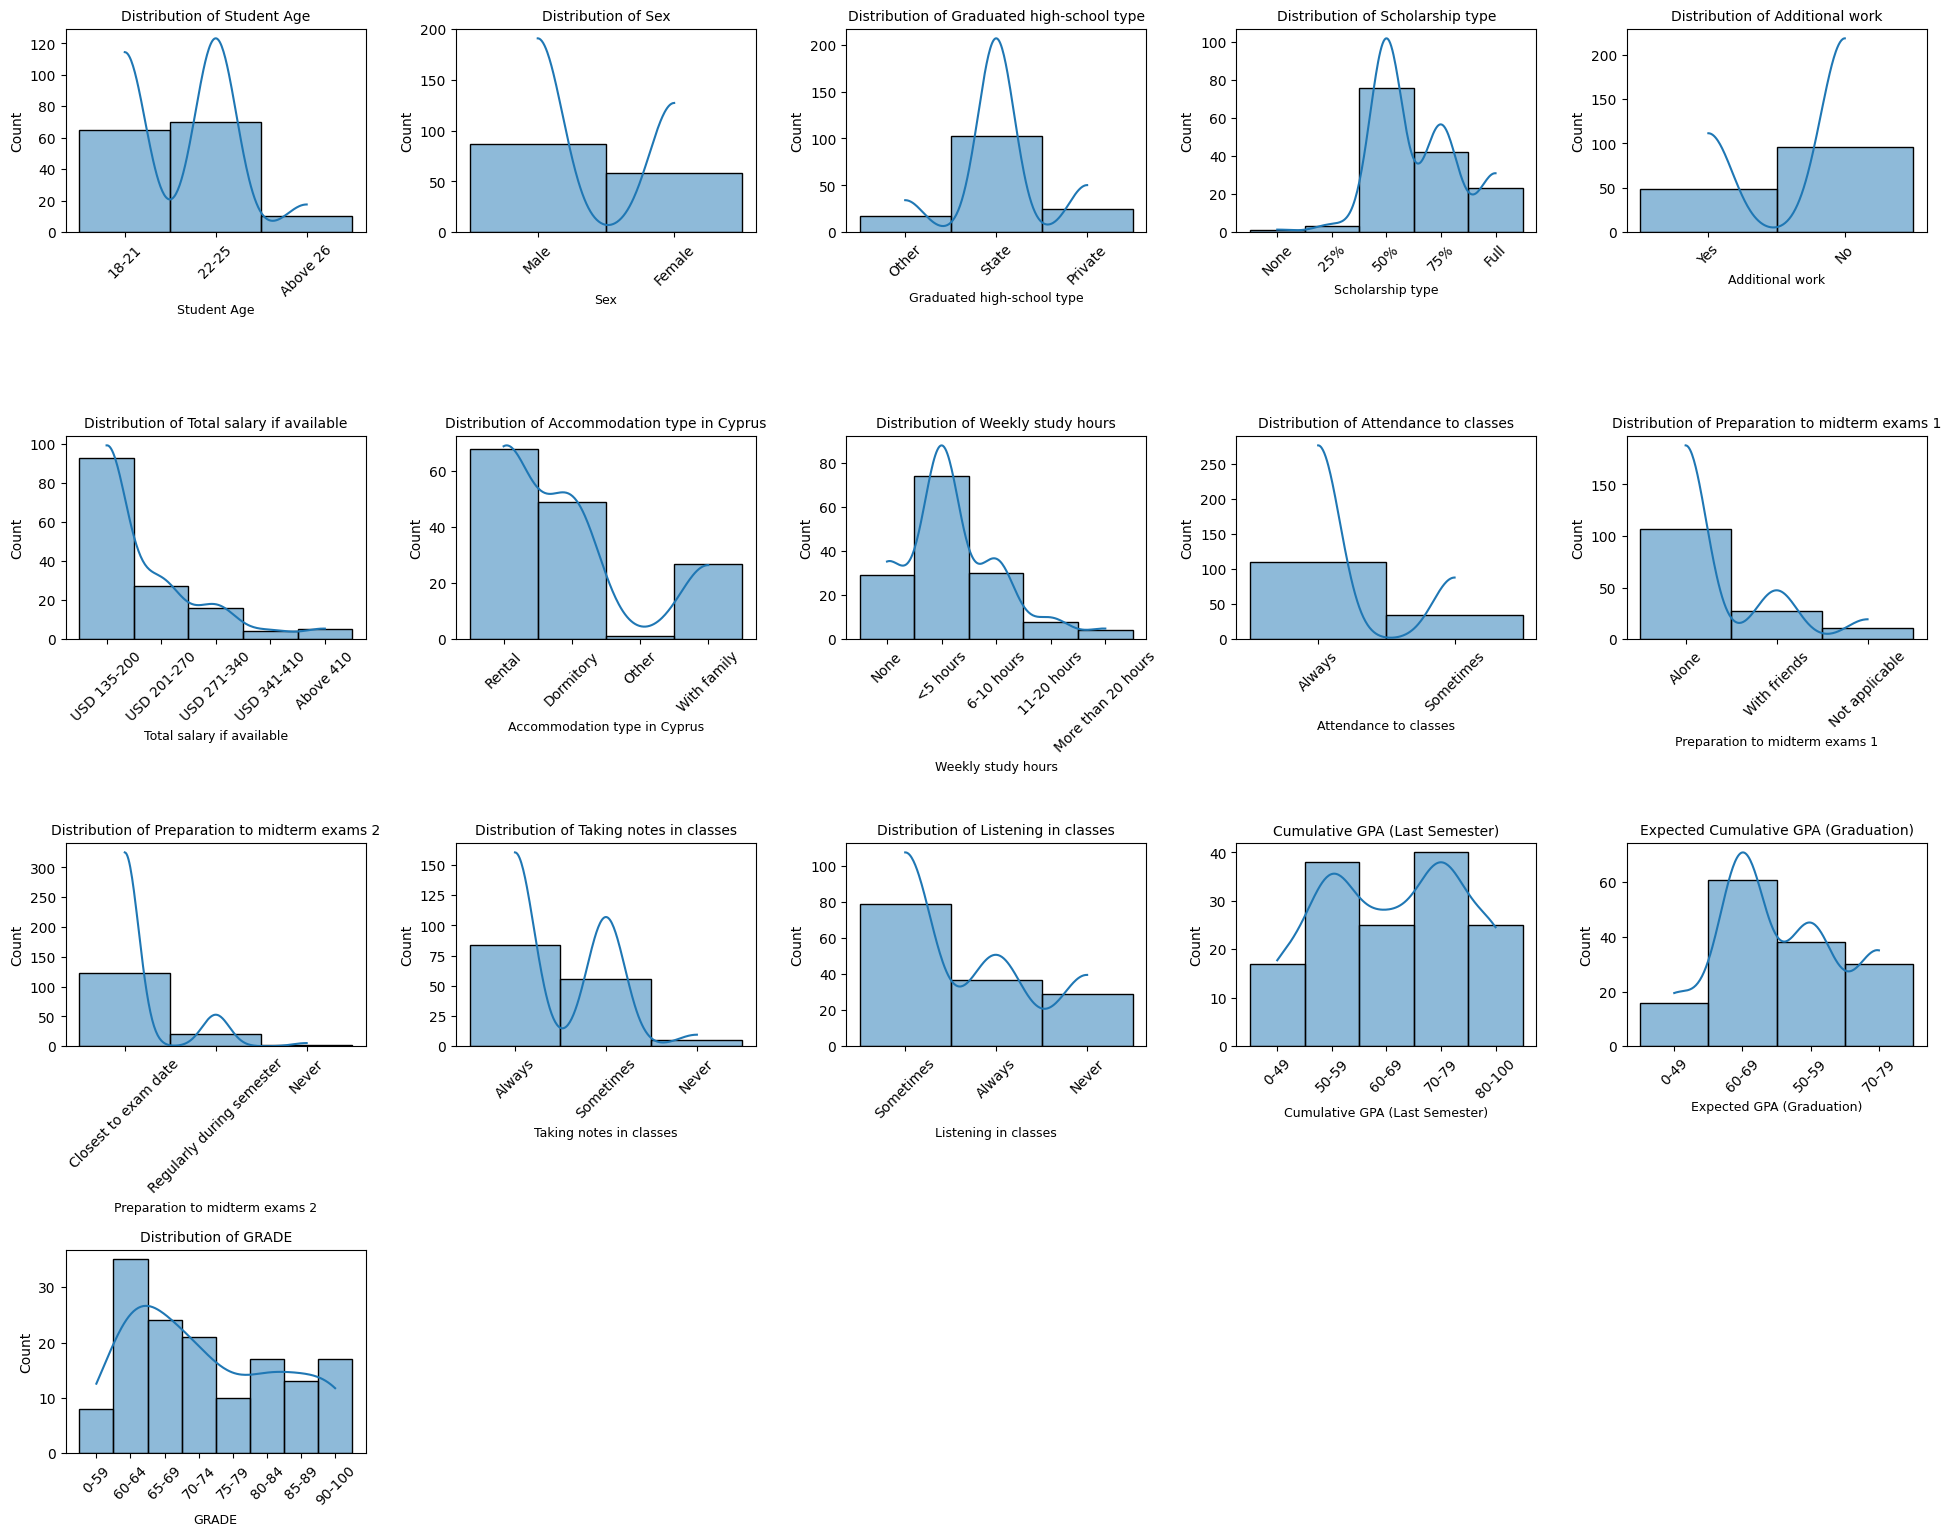

In [ ]:
interested_col = ['Student Age','Sex','Graduated high-school type','Scholarship type','Additional work','Total salary if available','Accommodation type in Cyprus',
                  'Weekly study hours', 'Attendance to classes','Preparation to midterm exams 1','Preparation to midterm exams 2',
                  'Taking notes in classes','Listening in classes','Cumulative grade point average in the last semester (/4.00)',
                  'Expected Cumulative grade point average in the graduation (/4.00)','GRADE']
visualize_distributions(analysis_data,interested_col)

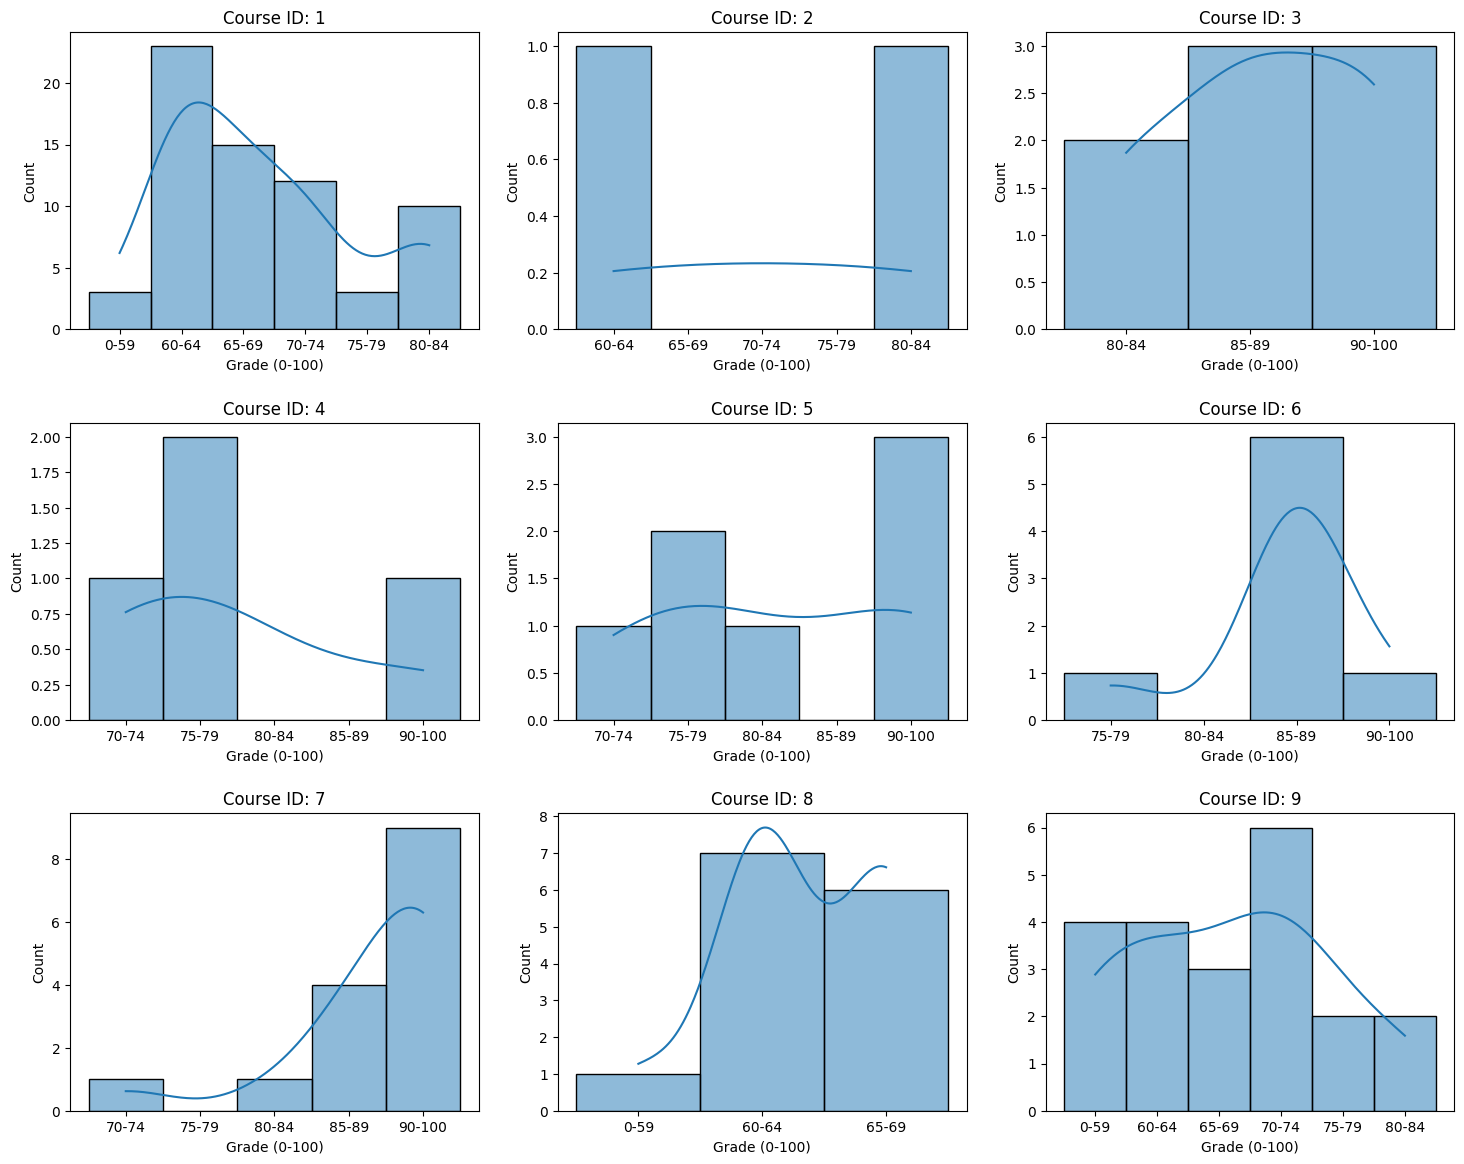

In [ ]:
unique_courses = analysis_data['COURSE ID'].unique()  # Get unique course IDs
num_courses = len(unique_courses)


num_cols = 3
num_rows = (num_courses + num_cols - 1) // num_cols  # Calculate the number of rows needed

plt.figure(figsize=(num_cols * 5, num_rows * 4))  # Adjust the figure size based on number of plots

# Loop through each course and plot its histogram
for i, course in enumerate(unique_courses):
    plt.subplot(num_rows, num_cols, i + 1)
    course_data = analysis_data[analysis_data['COURSE ID'] == course]  # Filter the data for the current course


    sns.histplot(course_data['GRADE'], kde=True, bins=10)

    plt.title(f'Course ID: {course}', fontsize=12)
    plt.xlabel('Grade (0-100)', fontsize=10)
    plt.ylabel('Count', fontsize=10)

plt.tight_layout(pad=2.0)
plt.show()

estimation

In [ ]:
#removing post-treatment
post_treatmenr_variables = ['Total salary if available', 'Transportation to the university',
                            'Attendance to classes', 'Weekly study hours', 'Listening in classes',
                            'Regular artistic or sports activity', 'Attendance to the seminars/conferences related to the department',
                            'Preparation to midterm exams 2', 'Taking notes in classes']
new_data = data.drop(columns=post_treatmenr_variables)
# one hot encoding for categorial features
new_data = pd.get_dummies(new_data, columns=['Student Age', 'Graduated high-school type', 'Additional work',
        'Sex', 'Do you have a partner', 'Accommodation type in Cyprus',
        'Mother’s education', 'Father’s education ', 'Parental status',
       'Mother’s occupation', 'Father’s occupation',
       'Reading frequency', 'Reading frequency.1', 'Preparation to midterm exams 1',
       'Impact of your projects/activities on your success',
       'Discussion improves my interest and success in the course', 'Flip-classroom',
       'Cumulative grade point average in the last semester (/4.00)',
       'Expected Cumulative grade point average in the graduation (/4.00)', 'COURSE ID'])

# removing redundant
new_data = new_data.drop(columns=['Sex_male', 'Do you have a partner_No','Additional work_No'])

# converting grades from chars to numbers (0.0-4.0)
grades_dict = {'AA': 4.00, 'BA': 3.50, 'BB': 3.00, 'CB': 2.50, 'CC': 2.00, 'DC': 1.50, 'DD': 1.00, 'Fail': 0.00}
new_data['GRADE'] = new_data['GRADE'].map(grades_dict)

# converting scholarship from to numbers
scholarship_dict = {'None': 0, '25%': 0.25, '50%': 0.5, '75%': 0.75, 'Full': 1}
new_data['Scholarship type'] = new_data['Scholarship type'].map(scholarship_dict).fillna(0)

# converting number of brothers and sisters to numbers
bro_sis_dict = {'1': 1, '2': 2, '3': 3, '4': 4, '5 or above': 5}
new_data['Number of sisters/brothers'] = new_data['Number of sisters/brothers'].map(bro_sis_dict)

print(new_data.columns)

Index(['STUDENT ID', 'Scholarship type', 'Number of sisters/brothers', 'GRADE',
       'Student Age_18-21', 'Student Age_22-25', 'Student Age_above 26',
       'Graduated high-school type_other',
       'Graduated high-school type_private',
       'Graduated high-school type_state', 'Additional work_Yes', 'Sex_female',
       'Do you have a partner_Yes', 'Accommodation type in Cyprus_Other',
       'Accommodation type in Cyprus_dormitory',
       'Accommodation type in Cyprus_rental',
       'Accommodation type in Cyprus_with family', 'Mother’s education_MSc.',
       'Mother’s education_Ph.D.', 'Mother’s education_high school',
       'Mother’s education_primary school',
       'Mother’s education_secondary school', 'Mother’s education_university',
       'Father’s education _MSc.', 'Father’s education _Ph.D.',
       'Father’s education _high school', 'Father’s education _primary school',
       'Father’s education _secondary school',
       'Father’s education _university',
       '

analysis

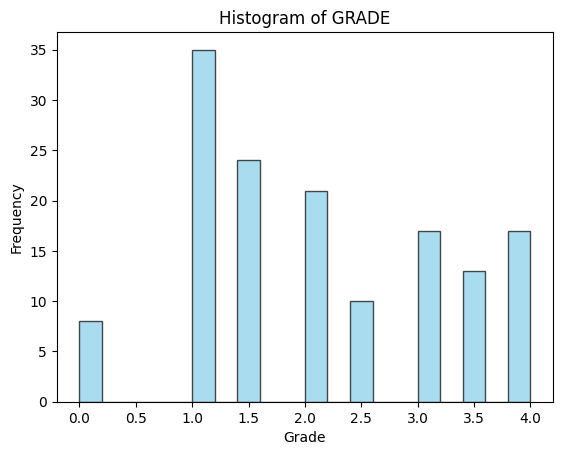

Mean of GRADE: 2.086206896551724
Variance of GRADE: 1.3102250957854409


In [ ]:
# Plot histogram of the 'GRADE' column
plt.hist(new_data['GRADE'], bins=20, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Histogram of GRADE')
plt.xlabel('Grade')
plt.ylabel('Frequency')
plt.show()

# Calculate and print the mean and variance
mean_grade = new_data['GRADE'].mean()
variance_grade = new_data['GRADE'].var()

print(f"Mean of GRADE: {mean_grade}")
print(f"Variance of GRADE: {variance_grade}")


Shapiro-Wilk test statistic: 0.9234424363295618, p-value: 5.213051085362113e-07
Kolmogorov-Smirnov test statistic: 0.15778802209798115, p-value: 0.0012783336010191101


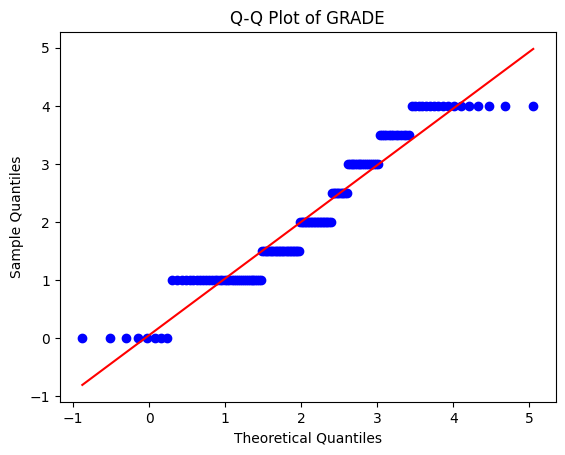

In [ ]:
# Calculate mean and standard deviation of GRADE
mean_grade = new_data['GRADE'].mean()
std_grade = new_data['GRADE'].std()

# Perform Shapiro-Wilk test
shapiro_test = stats.shapiro(new_data['GRADE'])
print(f"Shapiro-Wilk test statistic: {shapiro_test.statistic}, p-value: {shapiro_test.pvalue}")

# Perform Kolmogorov-Smirnov test comparing GRADE to a normal distribution with the same mean and std deviation
ks_test = stats.kstest(new_data['GRADE'], 'norm', args=(mean_grade, std_grade))
print(f"Kolmogorov-Smirnov test statistic: {ks_test.statistic}, p-value: {ks_test.pvalue}")

# Q-Q plot
stats.probplot(new_data['GRADE'], dist="norm", sparams=(mean_grade, std_grade), plot=plt)
plt.title('Q-Q Plot of GRADE')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.show()


Mean GRADE for Additional work_Yes=True: 1.8061224489795917
Mean GRADE for Additional work_Yes=False: 2.2291666666666665


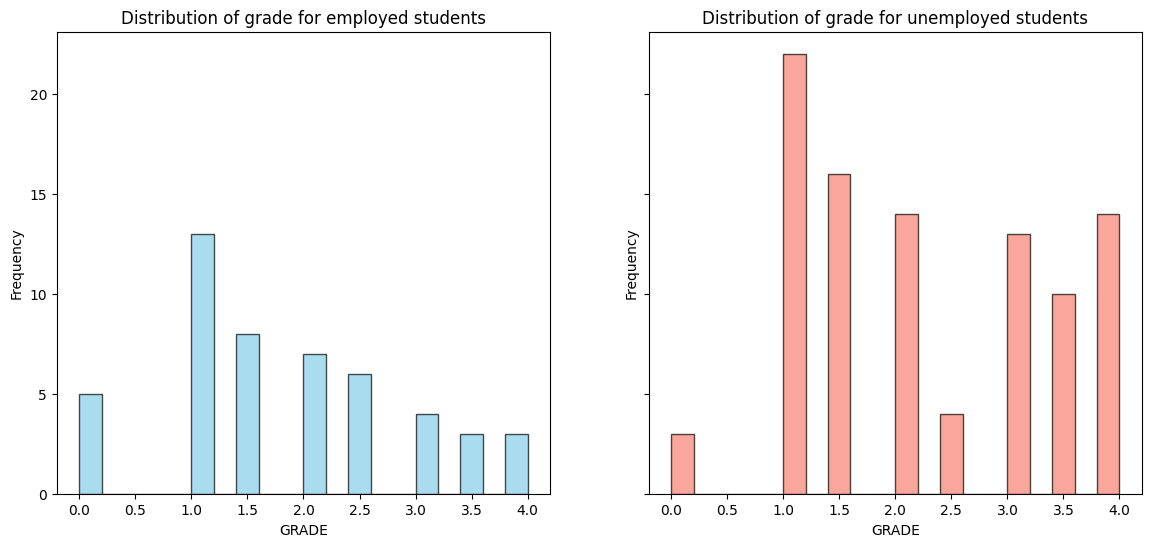

In [ ]:
# Separate data based on the binary column 'Additional work_Yes'
group_true = new_data[new_data['Additional work_Yes'] == True]
group_false = new_data[new_data['Additional work_Yes'] == False]

mean_true = group_true['GRADE'].mean()
mean_false = group_false['GRADE'].mean()
print(f"Mean GRADE for Additional work_Yes=True: {mean_true}")
print(f"Mean GRADE for Additional work_Yes=False: {mean_false}")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

ax1.hist(group_true['GRADE'], bins=20, color='skyblue', edgecolor='black', alpha=0.7)
ax1.set_title(f'Distribution of grade for employed students')
ax1.set_xlabel('GRADE')
ax1.set_ylabel('Frequency')

ax2.hist(group_false['GRADE'], bins=20, color='salmon', edgecolor='black', alpha=0.7)
ax2.set_title(f'Distribution of grade for unemployed students')
ax2.set_xlabel('GRADE')
ax2.set_ylabel('Frequency')

plt.show()


In [ ]:
cov_yT = new_data[['Additional work_Yes', 'GRADE']].cov().iloc[0, 1]
print(cov_yT)

-0.09530651340996167


calaulate ATE using ipw

In [ ]:
def calculate_propensity_scores(df):
    #all_features = df.drop(columns=['STUDENT ID', 'GRADE', 'Additional work_Yes'])
    T = df['Additional work_Yes']

    model = RandomForestClassifier(n_estimators=40, random_state=42)
    #features = all_features.columns
    features = ['Scholarship type', 'Number of sisters/brothers','Accommodation type in Cyprus_Other',
       'Student Age_18-21', 'Student Age_22-25', 'Student Age_above 26',
       'Accommodation type in Cyprus_dormitory',
       'Accommodation type in Cyprus_rental',
       'Accommodation type in Cyprus_with family',
       'Mother’s occupation_government officer',
       'Mother’s occupation_housewife',
       'Mother’s occupation_private sector employee',
       'Mother’s occupation_retired', 'Mother’s occupation_self-employment',
       'Father’s occupation_government officer',
       'Father’s occupation_housewife',
       'Father’s occupation_private sector employee',
       'Father’s occupation_retired', 'Father’s occupation_self-employment']
    X = df[features]
    model.fit(X, T)
    propensity_scores = model.predict_proba(X)[:, 1]

    return propensity_scores


Average propensity score for treated group: 0.7017318594104309
Average propensity score for control group: 0.16590505125661378


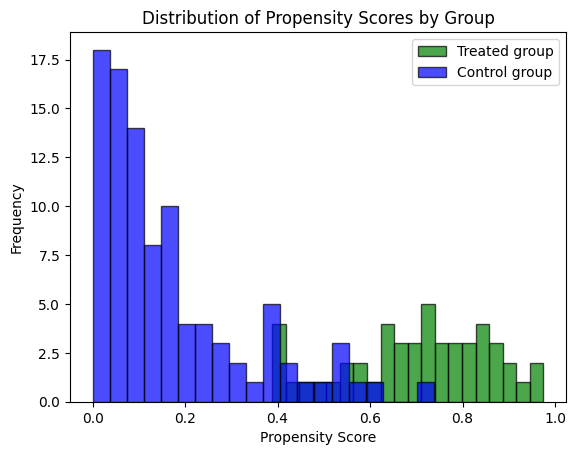

Correlation between propensity scores and treatment: 0.8454248004939292


In [ ]:
propensity_scores = calculate_propensity_scores(new_data)
new_data['propensity_score'] = propensity_scores

T = new_data['Additional work_Yes']
treated_mean = np.mean(propensity_scores[T == 1])
control_mean = np.mean(propensity_scores[T == 0])

print(f"Average propensity score for treated group: {treated_mean}")
print(f"Average propensity score for control group: {control_mean}")

# hitogram of the propensity scores
plt.hist(propensity_scores[T == 1], bins=20, color='green', edgecolor='black', alpha=0.7, label='Treated group')
plt.hist(propensity_scores[T == 0], bins=20, color='blue', edgecolor='black', alpha=0.7, label='Control group')
plt.title('Distribution of Propensity Scores by Group')
plt.xlabel('Propensity Score')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# correlation between propensities and T
correlation = np.corrcoef(propensity_scores, T)[0, 1]
print(f"Correlation between propensity scores and treatment: {correlation}")



In [ ]:
def calculate_att_ipw(df, target):
    propensities = df['propensity_score']
    T = df['Additional work_Yes']
    df['ipw'] = np.where(T == 1, 1 / propensities,  1 / (1 - propensities))
    ATT = np.mean(df[T == 1][target] * df['ipw']) - np.mean(df[T == 0][target] * df['ipw'])
    df = df.drop(columns=['ipw'])
    return ATT

In [ ]:
# calculation estimator for ATE via inverse propensity score weighting
target = 'GRADE'

att_ipw = calculate_att_ipw(new_data, target)
print(f"estimator for ATE is: {att_ipw}")

estimator for ATE is: -0.04722367351616974


95% Confidence Interval for ATT-IPW: [-0.9586315244201619, 0.9929016627822732]
p-value is: 0.552


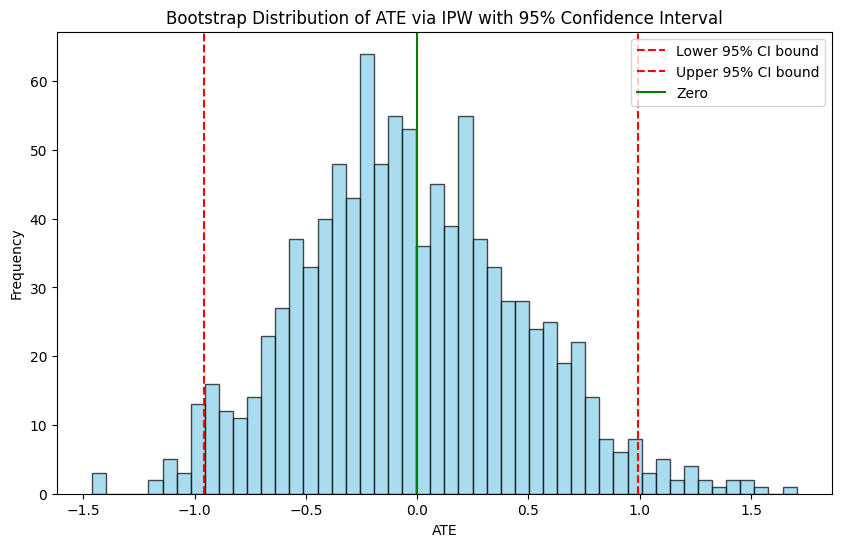

In [ ]:
# calculation CI for ATE via inverse propensity score weighting using bootstrap
warnings.filterwarnings("ignore", category=RuntimeWarning)
n_iterations = 1000
bootstrap_att_ipw = []
sum_no_negative = 0

# לולאה ליצירת 1,000 דגימות Bootstrap
for i in range(n_iterations):
    bootstrap_sample = new_data.sample(frac=1, replace=True)
    bootstrap_att_ipw_value = calculate_att_ipw(bootstrap_sample, target)

    if bootstrap_att_ipw_value <= 0:
      sum_no_negative += 1

    bootstrap_att_ipw.append(bootstrap_att_ipw_value)

if 'ipw' in new_data.columns:
    new_data = new_data.drop(columns=['ipw'])
lower_bound_ipw = np.percentile(bootstrap_att_ipw, 2.5)
upper_bound_ipw = np.percentile(bootstrap_att_ipw, 97.5)

# הדפסת התוצאה
print(f"95% Confidence Interval for ATT-IPW: [{lower_bound_ipw}, {upper_bound_ipw}]")

p_value = sum_no_negative/n_iterations
print(f"p-value is: {p_value}")


# Visualize the bootstrap distribution of the ATE values
plt.figure(figsize=(10, 6))
plt.hist(bootstrap_att_ipw, bins=50, color='skyblue', edgecolor='black', alpha=0.7)
plt.axvline(lower_bound_ipw, color='red', linestyle='--', label='Lower 95% CI bound')
plt.axvline(upper_bound_ipw, color='red', linestyle='--', label='Upper 95% CI bound')
plt.axvline(0, color='green', linestyle='-', label='Zero')

# Adding title and labels
plt.title('Bootstrap Distribution of ATE via IPW with 95% Confidence Interval')
plt.xlabel('ATE')
plt.ylabel('Frequency')
plt.legend()
plt.show()


s-learner

In [ ]:
def calculate_att_s_learner(df, target):
    X = df.drop(columns=['STUDENT ID', 'GRADE', 'Additional work_Yes', 'propensity_score'])
    T = df['Additional work_Yes']
    Y = df[target]

    X.columns = X.columns.astype(str)
    algorithms = ['GB', 'XGboost', 'random forest', 'SVR']
    alg = random.choice(algorithms)

    if alg == 'GB':
      model = GradientBoostingRegressor()
      model.fit(pd.concat([X, T], axis=1), Y)
      y1_pred = model.predict(pd.concat([X, pd.Series(np.ones(len(X)), name='Additional work_Yes')], axis=1))
      y0_pred = model.predict(pd.concat([X, pd.Series(np.zeros(len(X)), name='Additional work_Yes')], axis=1))

    if alg == 'XGboost':
      X.columns = X.columns.astype(str).str.replace('[\[\]<]', '', regex=True)
      model = XGBRegressor()
      model.fit(pd.concat([X, T], axis=1), Y)
      y1_pred = model.predict(pd.concat([X, pd.Series(np.ones(len(X)), name='Additional work_Yes')], axis=1))
      y0_pred = model.predict(pd.concat([X, pd.Series(np.zeros(len(X)), name='Additional work_Yes')], axis=1))

    if alg == 'random forest':
      model = RandomForestRegressor()
      model.fit(pd.concat([X, T], axis=1), Y)
      y1_pred = model.predict(pd.concat([X, pd.Series(np.ones(len(X)), name='Additional work_Yes')], axis=1))
      y0_pred = model.predict(pd.concat([X, pd.Series(np.zeros(len(X)), name='Additional work_Yes')], axis=1))

    if alg == 'SVR':
      model = SVR()
      model.fit(pd.concat([X, T], axis=1), Y)
      y1_pred = model.predict(pd.concat([X, pd.Series(np.ones(len(X)), name='Additional work_Yes')], axis=1))
      y0_pred = model.predict(pd.concat([X, pd.Series(np.zeros(len(X)), name='Additional work_Yes')], axis=1))

    ATT = np.mean(y1_pred[T == 1] - y0_pred[T == 1])
    return ATT

In [ ]:
# calculation estimator for ATE via s learner
target = 'GRADE'

att_s_learner = calculate_att_s_learner(new_data, target)
print(f"estimator for ATE is: {att_s_learner}")

estimator for ATE is: -0.13624983153059872


95% Confidence Interval for ATT-S-Learner: [-0.2826168264267456, 0.02044604506441243]
p-value is: 0.903


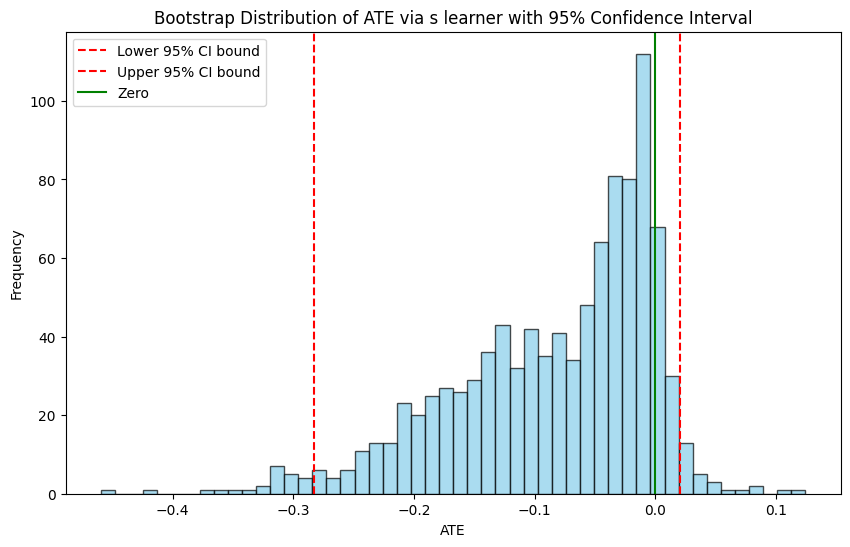

In [ ]:
# calculation CI for ATE via s learner using bootstrap
n_iterations = 1000
bootstrap_att_s_learner = []
sum_no_negative = 0

for i in range(n_iterations):
    bootstrap_sample = new_data.sample(frac=1, replace=True).reset_index(drop=True)
    bootstrap_att_s_learner_value = calculate_att_s_learner(bootstrap_sample, target)

    if bootstrap_att_s_learner_value <= 0:
      sum_no_negative += 1

    bootstrap_att_s_learner.append(bootstrap_att_s_learner_value)

lower_bound_s_learner = np.percentile(bootstrap_att_s_learner, 2.5)
upper_bound_s_learner = np.percentile(bootstrap_att_s_learner, 97.5)

print(f"95% Confidence Interval for ATT-S-Learner: [{lower_bound_s_learner}, {upper_bound_s_learner}]")

p_value = sum_no_negative/n_iterations
print(f"p-value is: {p_value}")

# Visualize the bootstrap distribution of the ATE values
plt.figure(figsize=(10, 6))
plt.hist(bootstrap_att_s_learner, bins=50, color='skyblue', edgecolor='black', alpha=0.7)
plt.axvline(lower_bound_s_learner, color='red', linestyle='--', label='Lower 95% CI bound')
plt.axvline(upper_bound_s_learner, color='red', linestyle='--', label='Upper 95% CI bound')
plt.axvline(0, color='green', linestyle='-', label='Zero')

# Adding title and labels
plt.title('Bootstrap Distribution of ATE via s learner with 95% Confidence Interval')
plt.xlabel('ATE')
plt.ylabel('Frequency')
plt.legend()
plt.show()

s learner 2d+1

In [ ]:
def calculate_att_s_learner_with_interactions(df, target):
    # הכנת הנתונים
    X = df.drop(columns=['STUDENT ID', 'GRADE', 'Additional work_Yes', 'propensity_score'])
    T = df['Additional work_Yes']
    Y = df[target]

    # יצירת אינטראקציות מסדר ראשון עם משתנה הטיפול T
    X_interactions = X.mul(T, axis=0)  # מכפיל את כל הפיצ'רים ב-T
    X_interactions.columns = [f"{col}_interaction" for col in X.columns]  # שינוי שמות העמודות

    # שילוב האינטראקציות בנתוני הקלט
    X_combined = pd.concat([X, T, X_interactions], axis=1)

    # המרת סוגי הנתונים של העמודות לוודא שהן כל כולן מחרוזות
    X_combined.columns = X_combined.columns.astype(str)

    # הבחירה של האלגוריתם
    algorithms = ['GB', 'XGboost', 'random forest', 'SVR']
    alg = random.choice(algorithms)

    if alg == 'GB':
        model = GradientBoostingRegressor()
        model.fit(X_combined, Y)
        y1_pred = model.predict(pd.concat([X, pd.Series(np.ones(len(X)), name='Additional work_Yes'), X_interactions], axis=1))
        y0_pred = model.predict(pd.concat([X, pd.Series(np.zeros(len(X)), name='Additional work_Yes'), X_interactions], axis=1))

    elif alg == 'XGboost':
        X_combined.columns = X_combined.columns.astype(str).str.replace('[\[\]<]', '', regex=True)
        X.columns = X.columns.astype(str).str.replace('[\[\]<]', '', regex=True)
        X_interactions.columns = X_interactions.columns.astype(str).str.replace('[\[\]<]', '', regex=True)
        model = XGBRegressor()
        model.fit(X_combined, Y)
        y1_pred = model.predict(pd.concat([X, pd.Series(np.ones(len(X)), name='Additional work_Yes'), X_interactions], axis=1))
        y0_pred = model.predict(pd.concat([X, pd.Series(np.zeros(len(X)), name='Additional work_Yes'), X_interactions], axis=1))

    elif alg == 'random forest':
        model = RandomForestRegressor()
        model.fit(X_combined, Y)
        y1_pred = model.predict(pd.concat([X, pd.Series(np.ones(len(X)), name='Additional work_Yes'), X_interactions], axis=1))
        y0_pred = model.predict(pd.concat([X, pd.Series(np.zeros(len(X)), name='Additional work_Yes'), X_interactions], axis=1))

    elif alg == 'SVR':
        model = SVR()
        model.fit(X_combined, Y)
        y1_pred = model.predict(pd.concat([X, pd.Series(np.ones(len(X)), name='Additional work_Yes'), X_interactions], axis=1))
        y0_pred = model.predict(pd.concat([X, pd.Series(np.zeros(len(X)), name='Additional work_Yes'), X_interactions], axis=1))

    # חישוב ATT עבור קבוצת הטיפול
    ATT = np.mean(y1_pred[T == 1] - y0_pred[T == 1])
    return ATT


In [ ]:
# calculation estimator for ATE via s learner 2d+1
target = 'GRADE'

att_s_learner_with_interactions = calculate_att_s_learner_with_interactions(new_data, target)
print(f"estimator for ATE is: {att_s_learner_with_interactions}")

estimator for ATE is: 0.0020397561602294445


95% Confidence Interval for ATT-S-Learner 2d+1: [-0.04191663736777698, 0.008363240318819425]
p-value is: 0.842


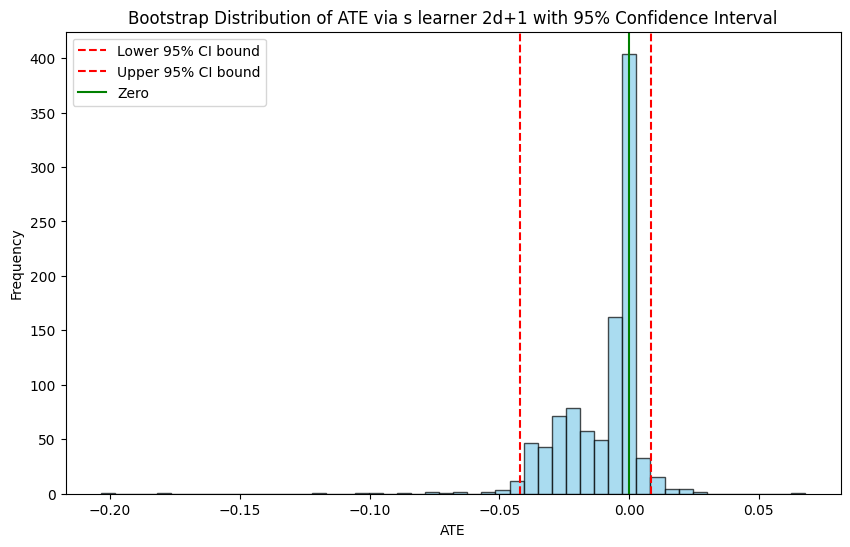

In [ ]:
# calculation CI for ATE via s learner 2d+1 using bootstrap
n_iterations = 1000
bootstrap_att_s_learner_with_interactions = []
sum_no_negative = 0

for i in range(n_iterations):
    bootstrap_sample = new_data.sample(frac=1, replace=True).reset_index(drop=True)
    bootstrap_att_s_learner_with_interactions_value = calculate_att_s_learner_with_interactions(bootstrap_sample, target)

    if bootstrap_att_s_learner_with_interactions_value <= 0:
      sum_no_negative += 1

    bootstrap_att_s_learner_with_interactions.append(bootstrap_att_s_learner_with_interactions_value)

lower_bound_s_learner_with_interactions = np.percentile(bootstrap_att_s_learner_with_interactions, 2.5)
upper_bound_s_learner_with_interactions = np.percentile(bootstrap_att_s_learner_with_interactions, 97.5)

print(f"95% Confidence Interval for ATT-S-Learner 2d+1: [{lower_bound_s_learner_with_interactions}, {upper_bound_s_learner_with_interactions}]")

p_value = sum_no_negative/n_iterations
print(f"p-value is: {p_value}")

# Visualize the bootstrap distribution of the ATE values
plt.figure(figsize=(10, 6))
plt.hist(bootstrap_att_s_learner_with_interactions, bins=50, color='skyblue', edgecolor='black', alpha=0.7)
plt.axvline(lower_bound_s_learner_with_interactions, color='red', linestyle='--', label='Lower 95% CI bound')
plt.axvline(upper_bound_s_learner_with_interactions, color='red', linestyle='--', label='Upper 95% CI bound')
plt.axvline(0, color='green', linestyle='-', label='Zero')

# Adding title and labels
plt.title('Bootstrap Distribution of ATE via s learner 2d+1 with 95% Confidence Interval')
plt.xlabel('ATE')
plt.ylabel('Frequency')
plt.legend()
plt.show()

 t learner

In [ ]:
def calculate_att_t_learner(df, target):
    X = df.drop(columns=['STUDENT ID', 'GRADE', 'Additional work_Yes', 'propensity_score'])
    T = df['Additional work_Yes']
    Y = df[target]

    algorithms = ['GB', 'XGboost', 'random forest', 'SVR']
    alg = random.choice(algorithms)

    if alg == 'GB':
      model_treated = GradientBoostingRegressor()
      model_control = GradientBoostingRegressor()
      model_treated.fit(X[T == 1], Y[T == 1])
      model_control.fit(X[T == 0], Y[T == 0])
      y1_pred = model_treated.predict(X)
      y0_pred = model_control.predict(X)

    if alg == 'XGboost':
      X.columns = X.columns.astype(str).str.replace('[\[\]<]', '', regex=True)
      model_treated = XGBRegressor()
      model_control = XGBRegressor()
      model_treated.fit(X[T == 1], Y[T == 1])
      model_control.fit(X[T == 0], Y[T == 0])
      y1_pred = model_treated.predict(X)
      y0_pred = model_control.predict(X)

    if alg == 'random forest':
      model_treated = RandomForestRegressor()
      model_control = RandomForestRegressor()
      model_treated.fit(X[T == 1], Y[T == 1])
      model_control.fit(X[T == 0], Y[T == 0])
      y1_pred = model_treated.predict(X)
      y0_pred = model_control.predict(X)

    if alg == 'SVR':
      model_treated = SVR()
      model_control = SVR()
      model_treated.fit(X[T == 1], Y[T == 1])
      model_control.fit(X[T == 0], Y[T == 0])
      y1_pred = model_treated.predict(X)
      y0_pred = model_control.predict(X)

    ATT = np.mean(y1_pred[T == 1] - y0_pred[T == 1])
    return ATT

In [ ]:
# calculation estimator for ATE via t learner
target = 'GRADE'

att_t_learner = calculate_att_t_learner(new_data, target)
print(f"estimator for ATE is: {att_t_learner}")

estimator for ATE is: -0.23379518071986233


95% Confidence Interval for ATT-T-Learner: [-0.7249087056842473, 0.09929083585739133]
p-value is: 0.908


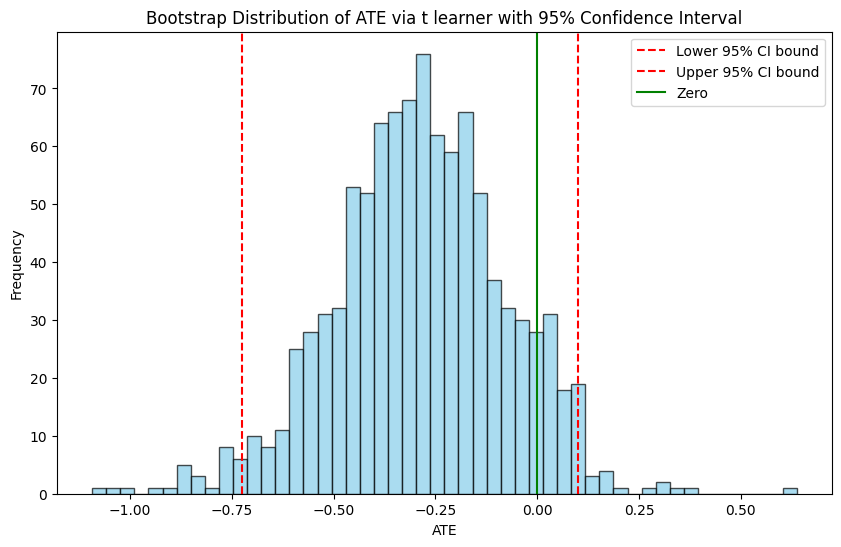

In [ ]:
# calculation CI for ATE via t learner using bootstrap
n_iterations = 1000
bootstrap_att_t_learner = []
sum_no_negative = 0

for i in range(n_iterations):
    bootstrap_sample = new_data.sample(frac=1, replace=True)
    bootstrap_att_t_learner_value = calculate_att_t_learner(bootstrap_sample, target)

    if bootstrap_att_t_learner_value <= 0:
      sum_no_negative += 1

    bootstrap_att_t_learner.append(bootstrap_att_t_learner_value)

lower_bound_t_learner = np.percentile(bootstrap_att_t_learner, 2.5)
upper_bound_t_learner = np.percentile(bootstrap_att_t_learner, 97.5)

print(f"95% Confidence Interval for ATT-T-Learner: [{lower_bound_t_learner}, {upper_bound_t_learner}]")

p_value = sum_no_negative/n_iterations
print(f"p-value is: {p_value}")

# Visualize the bootstrap distribution of the ATE values
plt.figure(figsize=(10, 6))
plt.hist(bootstrap_att_t_learner, bins=50, color='skyblue', edgecolor='black', alpha=0.7)
plt.axvline(lower_bound_t_learner, color='red', linestyle='--', label='Lower 95% CI bound')
plt.axvline(upper_bound_t_learner, color='red', linestyle='--', label='Upper 95% CI bound')
plt.axvline(0, color='green', linestyle='-', label='Zero')

# Adding title and labels
plt.title('Bootstrap Distribution of ATE via t learner with 95% Confidence Interval')
plt.xlabel('ATE')
plt.ylabel('Frequency')
plt.legend()
plt.show()

r learner

In [ ]:
def calculate_att_r_learner(df, target):
    X = df.drop(columns=['STUDENT ID', 'GRADE', 'Additional work_Yes', 'propensity_score'])
    T = df['Additional work_Yes']
    Y = df[target]

    algorithms = ['GB', 'XGboost', 'random forest', 'SVR']
    alg = random.choice(algorithms)

    if alg == 'GB':
        model_outcome = GradientBoostingRegressor()
    elif alg == 'XGboost':
        X.columns = X.columns.astype(str).str.replace('[\[\]<]', '', regex=True)
        model_outcome = XGBRegressor()
    elif alg == 'random forest':
        model_outcome = RandomForestRegressor()
    elif alg == 'SVR':
        model_outcome = SVR()

    model_outcome.fit(X, Y)
    y_pred = model_outcome.predict(X)

    propensity_scores = df['propensity_score']
    residuals = Y - y_pred
    residuals_treated = residuals[T == 1] / propensity_scores[T == 1]
    residuals_control = residuals[T == 0] / (1 - propensity_scores[T == 0])

    if alg == 'GB':
        model_residuals = GradientBoostingRegressor()
    elif alg == 'XGboost':
        model_residuals = XGBRegressor()
    elif alg == 'random forest':
        model_residuals = RandomForestRegressor()
    elif alg == 'SVR':
        model_residuals = SVR()

    model_residuals.fit(X[T == 1], residuals_treated)
    tau_treated = model_residuals.predict(X)

    model_residuals.fit(X[T == 0], residuals_control)
    tau_control = model_residuals.predict(X)

    ATT = np.mean(tau_treated[T == 1] - tau_control[T == 1])
    return ATT


In [ ]:
# calculation estimator for ATE via r learner
target = 'GRADE'

att_r_learner = calculate_att_r_learner(new_data, target)
print(f"estimator for ATE is: {att_r_learner}")

estimator for ATE is: -0.15255174970427032


95% Confidence Interval for ATT-R-Learner: [-0.3073625345163248, 0.09937075660319443]
p-value is: 0.717


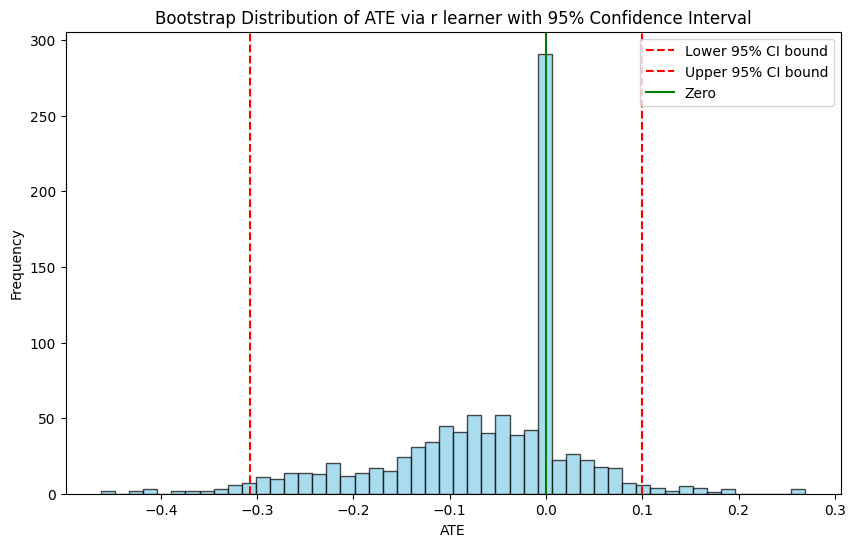

In [ ]:
# calculation CI for ATE via r learner using bootstrap
n_iterations = 1000
bootstrap_att_r_learner = []
sum_no_negative = 0

for i in range(n_iterations):
    bootstrap_sample = new_data.sample(frac=1, replace=True)
    bootstrap_att_r_learner_value = calculate_att_r_learner(bootstrap_sample, target)

    if bootstrap_att_r_learner_value <= 0:
      sum_no_negative += 1

    bootstrap_att_r_learner.append(bootstrap_att_r_learner_value)

lower_bound_r_learner = np.percentile(bootstrap_att_r_learner, 2.5)
upper_bound_r_learner = np.percentile(bootstrap_att_r_learner, 97.5)

print(f"95% Confidence Interval for ATT-R-Learner: [{lower_bound_r_learner}, {upper_bound_r_learner}]")

p_value = sum_no_negative/n_iterations
print(f"p-value is: {p_value}")

# Visualize the bootstrap distribution of the ATE values
plt.figure(figsize=(10, 6))
plt.hist(bootstrap_att_r_learner, bins=50, color='skyblue', edgecolor='black', alpha=0.7)
plt.axvline(lower_bound_r_learner, color='red', linestyle='--', label='Lower 95% CI bound')
plt.axvline(upper_bound_r_learner, color='red', linestyle='--', label='Upper 95% CI bound')
plt.axvline(0, color='green', linestyle='-', label='Zero')

# Adding title and labels
plt.title('Bootstrap Distribution of ATE via r learner with 95% Confidence Interval')
plt.xlabel('ATE')
plt.ylabel('Frequency')
plt.legend()
plt.show()

causal forest

In [ ]:
def calculate_att_causal_forest(df, target):
    X = df.drop(columns=['STUDENT ID', 'GRADE', 'Additional work_Yes', 'propensity_score'])
    T = df['Additional work_Yes'].values
    Y = df[target].values

    X_train, X_test, y_train, y_test, T_train, T_test = train_test_split(X, Y, T, test_size=0.5, random_state=42)

    causal_forest = CausalForestDML(
        model_y=RandomForestRegressor(n_estimators=100, min_samples_leaf=5),
        model_t=RandomForestClassifier(n_estimators=100, min_samples_leaf=5),
        discrete_treatment=True,
        random_state=42
    )

    causal_forest.fit(y_train, T_train, X=X_train)
    ate = causal_forest.ate(X_test)

    return ate


In [ ]:
# calculation estimator for ATE via causal forest
target = 'GRADE'
att_causal_forest = calculate_att_causal_forest(new_data, target)
print(f"estimator for ATE is: {att_causal_forest}")

estimator for ATE is: -0.6076692306298301


95% Confidence Interval for ATT - causal forest: [-0.8924384639742594, 0.14265707698272165]
p-value is: 0.919


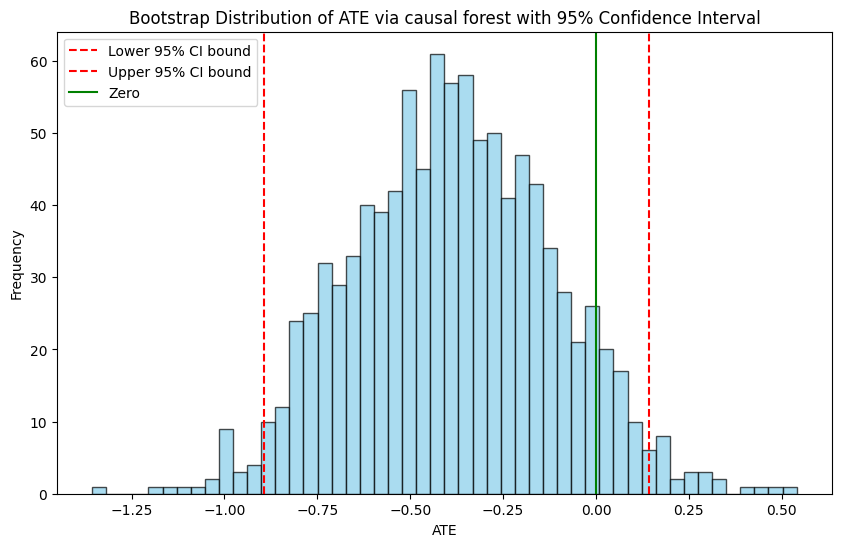

In [ ]:
# calculation CI for ATE via causal forest using bootstrap
n_iterations = 1000
bootstrap_att_causal_forest = []
sum_no_negative = 0

for i in range(n_iterations):
    # דגימה מתוך new_data עם החזרה (bootstrap)
    bootstrap_sample = new_data.sample(frac=1, replace=True)
    bootstrap_att_causal_forest_value = calculate_att_causal_forest(bootstrap_sample, target)

    if bootstrap_att_causal_forest_value <= 0:
      sum_no_negative += 1

    bootstrap_att_causal_forest.append(bootstrap_att_causal_forest_value)

lower_bound_causal_forest = np.percentile(bootstrap_att_causal_forest, 2.5)
upper_bound_causal_forest = np.percentile(bootstrap_att_causal_forest, 97.5)

print(f"95% Confidence Interval for ATT - causal forest: [{lower_bound_causal_forest}, {upper_bound_causal_forest}]")

p_value = sum_no_negative/n_iterations
print(f"p-value is: {p_value}")

# Visualize the bootstrap distribution of the ATE values
plt.figure(figsize=(10, 6))
plt.hist(bootstrap_att_causal_forest, bins=50, color='skyblue', edgecolor='black', alpha=0.7)
plt.axvline(lower_bound_causal_forest, color='red', linestyle='--', label='Lower 95% CI bound')
plt.axvline(upper_bound_causal_forest, color='red', linestyle='--', label='Upper 95% CI bound')
plt.axvline(0, color='green', linestyle='-', label='Zero')

# Adding title and labels
plt.title('Bootstrap Distribution of ATE via causal forest with 95% Confidence Interval')
plt.xlabel('ATE')
plt.ylabel('Frequency')
plt.legend()
plt.show()

total

In [ ]:
intersection_lower_bound = max(lower_bound_ipw, lower_bound_s_learner, lower_bound_t_learner, lower_bound_r_learner, lower_bound_causal_forest)
intersection_upper_bound = min(upper_bound_ipw, upper_bound_s_learner,  upper_bound_t_learner, upper_bound_r_learner, upper_bound_causal_forest)

if intersection_lower_bound > intersection_upper_bound:
  print('intersection of Confidence Interval is empty')
else:
  print(f"intersection of Confidence Interval is: [{intersection_lower_bound}, {intersection_upper_bound}]")


union_lower_bound = min(lower_bound_ipw, lower_bound_s_learner, lower_bound_s_learner_with_interactions, lower_bound_t_learner, lower_bound_r_learner, lower_bound_causal_forest)
union_upper_bound = max(upper_bound_ipw, upper_bound_s_learner, upper_bound_s_learner_with_interactions, upper_bound_t_learner, upper_bound_r_learner, upper_bound_causal_forest)

print(f"union of Confidence Interval is: [{union_lower_bound}, {union_upper_bound}]")

intersection of Confidence Interval is: [-0.2826168264267456, 0.02044604506441243]
union of Confidence Interval is: [-0.9586315244201619, 0.9929016627822732]


matching

In [ ]:
def calculate_att_matching(df, target, metric):
    X = df.drop(columns=['STUDENT ID', 'GRADE', 'Additional work_Yes', 'propensity_score'])
    T = df['Additional work_Yes']
    Y = df[target]
    nn = NearestNeighbors(n_neighbors=1, metric=metric)
    nn.fit(X[T == 0])
    distances, indices = nn.kneighbors(X[T == 1])
    matched_outcomes = Y[T == 0].iloc[indices.flatten()]
    ATT = np.mean(Y[T == 1] - matched_outcomes.to_numpy())
    return ATT

In [ ]:
# calculation estimator for ATE via matching
target = 'GRADE'
metrics = ['euclidean', 'manhattan', 'jaccard', 'cosine']
for metric in metrics:
  att_matching = calculate_att_matching(new_data, target, metric)
  print(f"estimator for ATE using {metric} metric is: {att_matching}")

estimator for ATE using euclidean metric is: -0.1836734693877551
estimator for ATE using manhattan metric is: -0.05102040816326531
estimator for ATE using jaccard metric is: 0.030612244897959183
estimator for ATE using cosine metric is: -0.030612244897959183


Data was converted to boolean for metric jaccard


instrumental variable

In [ ]:
cov_yz = new_data[['Scholarship type', 'GRADE']].cov().iloc[0, 1]
cov_Tz = new_data[['Scholarship type', 'Additional work_Yes']].cov().iloc[0, 1]
ATE_IV = cov_yz / cov_Tz
print(ATE_IV )

-0.9332579185520352


casual graph

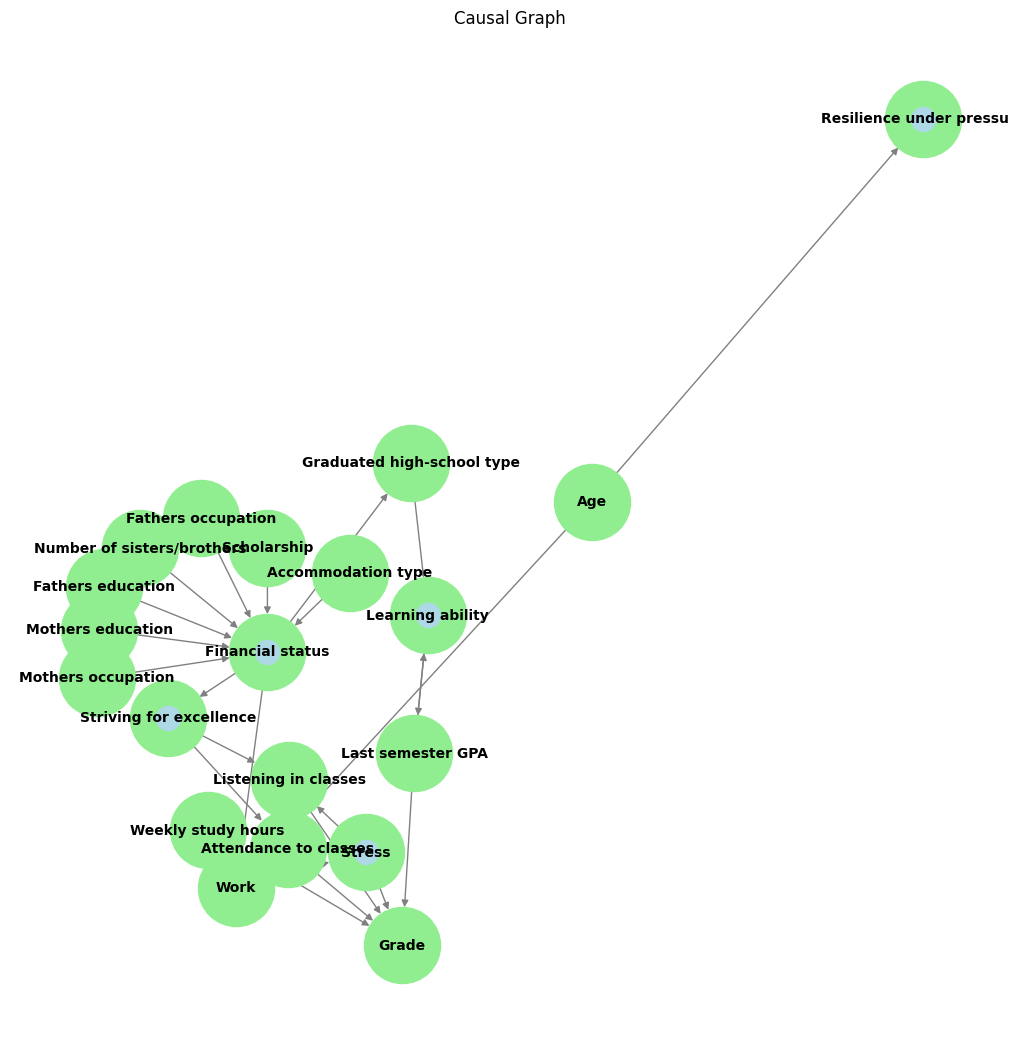

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a directed graph
G = nx.DiGraph()

# Add nodes (green nodes are observed, blue nodes are unobserved)
observed_nodes = [
    'Number of sisters/brothers', 'Scholarship', 'Mothers occupation', 'Mothers education', 'Fathers occupation',
    'Fathers education', 'Accommodation type', 'Graduated high-school type', 'Last semester GPA', 'Age',
    'Work', 'Attendance to classes', 'Listening in classes', 'Weekly study hours', 'Grade'
]
unobserved_nodes = ['Financial status', 'Striving for excellence', 'Learning ability', 'Stress', 'Resilience under pressure']

# Add edges based on the relationships in the diagram
edges = [
    # Relationships with Financial Status
    ('Number of sisters/brothers', 'Financial status'), ('Scholarship', 'Financial status'),
    ('Mothers occupation', 'Financial status'), ('Mothers education', 'Financial status'),
    ('Fathers occupation', 'Financial status'), ('Fathers education', 'Financial status'),
    ('Accommodation type', 'Financial status'),

    # Financial Status to other nodes
    ('Financial status', 'Graduated high-school type'), ('Financial status', 'Striving for excellence'),
    ('Financial status', 'Work'),

    # Connections with Striving for Excellence
    ('Striving for excellence', 'Attendance to classes'), ('Striving for excellence', 'Listening in classes'),

    # Connections with Learning Ability
    ('Graduated high-school type', 'Learning ability'), ('Last semester GPA', 'Learning ability'),

    # Connections with Work and Age
    ('Age', 'Work'), ('Age', 'Resilience under pressure'), ('Work', 'Stress'),
    ('Stress', 'Grade'), ('Stress', 'Attendance to classes'), ('Stress', 'Listening in classes'),
    ('Work', 'Attendance to classes'), ('Work', 'Weekly study hours'),

    # Connections affecting Grade
    ('Attendance to classes', 'Grade'), ('Listening in classes', 'Grade'),
    ('Weekly study hours', 'Grade'), ('Last semester GPA', 'Grade'),
    ('Learning ability', 'Last semester GPA')
]

# Add nodes and edges to the graph
G.add_nodes_from(observed_nodes + unobserved_nodes)
G.add_edges_from(edges)

# Visualize the graph structure (optional)
plt.figure(figsize=(10, 10))
pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos, with_labels=True, node_size=3000, node_color='lightgreen', font_size=10, font_weight='bold', edge_color='gray')
nx.draw_networkx_nodes(G, pos, nodelist=unobserved_nodes, node_color='lightblue')
plt.title("Causal Graph")
plt.show()

With Post treatment

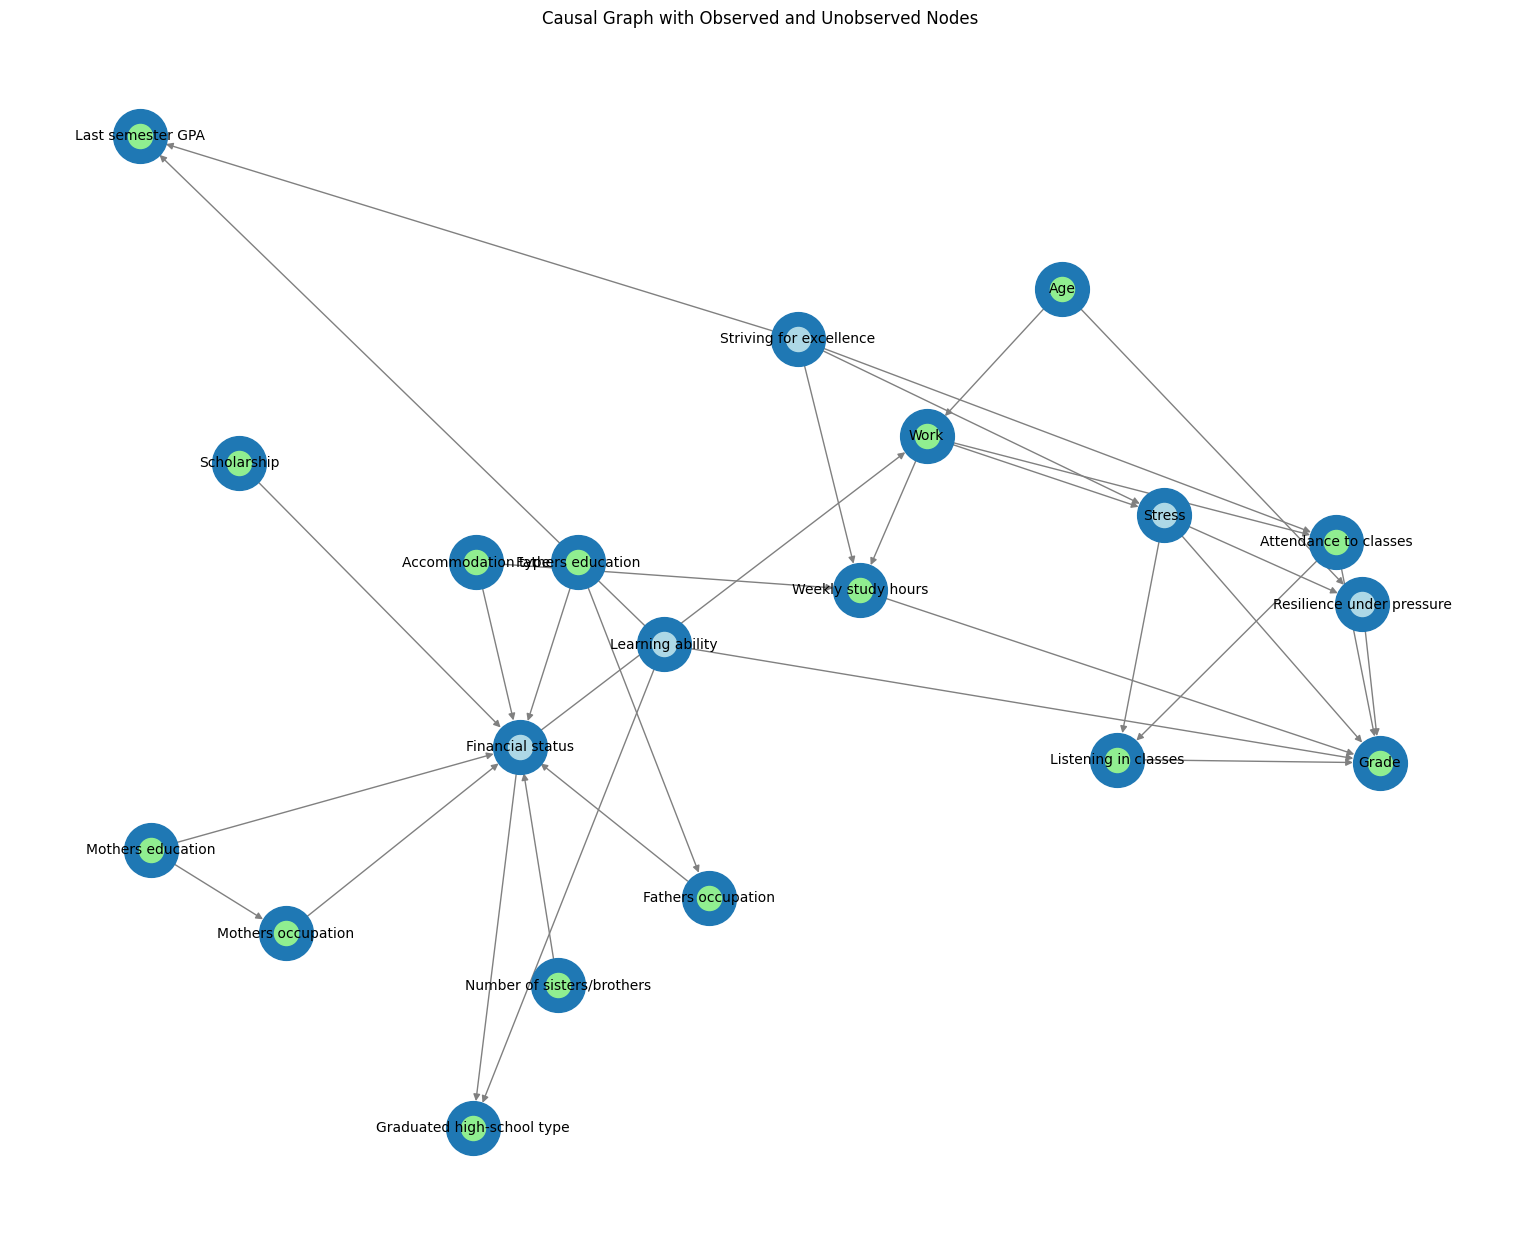

In [ ]:
import networkx as nx

# Create a directed graph
G = nx.DiGraph()

# Add nodes (green nodes are observed, blue nodes are unobserved)
observed_nodes = [
    'Number of sisters/brothers', 'Scholarship', 'Mothers occupation', 'Mothers education', 'Fathers occupation',
    'Fathers education',
    'Accommodation type',
    'Graduated high-school type', 'Last semester GPA', 'Age',
    'Work',
    'Attendance to classes', 'Listening in classes', 'Weekly study hours',
    'Grade'
]
unobserved_nodes = ['Financial status', 'Striving for excellence', 'Learning ability',
                    'Stress',
                    'Resilience under pressure']

# Add edges based on the relationships in the diagram
edges = [
    # Relationships with Financial Status
    ('Number of sisters/brothers', 'Financial status'), ('Scholarship', 'Financial status'),
    ('Mothers occupation', 'Financial status'), ('Mothers education', 'Financial status'),
    ('Fathers occupation', 'Financial status'), ('Fathers education', 'Financial status'),
    ('Accommodation type', 'Financial status'),('Mothers education', 'Mothers occupation'),
    ('Fathers education', 'Fathers occupation'),

    # Financial Status to other nodes
    ('Financial status', 'Graduated high-school type'),
    ('Financial status', 'Work'),

    # Connections with Striving for Excellence
    ('Striving for excellence', 'Attendance to classes'),
    ('Striving for excellence', 'Stress'),
    ('Striving for excellence', 'Weekly study hours'),
     ('Striving for excellence', 'Last semester GPA'),

    # Connections with Learning Ability
    ('Learning ability','Graduated high-school type'), ('Learning ability','Last semester GPA'),
    ('Learning ability','Grade'),

    # Connections with Work and Age
    ('Age', 'Work'), ('Age', 'Resilience under pressure'),
    ('Work', 'Stress'),
    ('Stress', 'Grade'),
    ('Stress', 'Resilience under pressure'),
    ('Stress', 'Listening in classes'),
    ('Work', 'Attendance to classes'), ('Work', 'Weekly study hours'),


    # Connections affecting Grade
    ('Attendance to classes', 'Grade'), ('Listening in classes', 'Grade'),
    ('Weekly study hours', 'Grade'),
    ('Learning ability', 'Grade'),('Resilience under pressure', 'Grade'),

    # Added missing connection
    ('Resilience under pressure', 'Grade'),
     ('Attendance to classes', 'Listening in classes'),
    ('Accommodation type', 'Weekly study hours')
]

# Add nodes and edges to the graph
# G.add_nodes_from(observed_nodes + unobserved_nodes)
G.add_edges_from(edges)

# Improved layout visualization
plt.figure(figsize=(15, 12))
pos = nx.spring_layout(G, seed=15, k=0.7)  # k controls the spacing between nodes; higher value for more space
nx.draw(G, pos, with_labels=True, node_size=1500, font_size=10,  edge_color='gray')

# Color the nodes
nx.draw_networkx_nodes(G, pos, nodelist=observed_nodes, node_color='lightgreen')
nx.draw_networkx_nodes(G, pos, nodelist=unobserved_nodes, node_color='lightblue')

plt.title("Causal Graph with Observed and Unobserved Nodes")
plt.show()

In [ ]:
T = {'Work'}
y = {'Grade'}
z = nx.find_minimal_d_separator(G, T, y)
z

{'Age', 'Attendance to classes', 'Stress', 'Weekly study hours'}

Without Post treatment

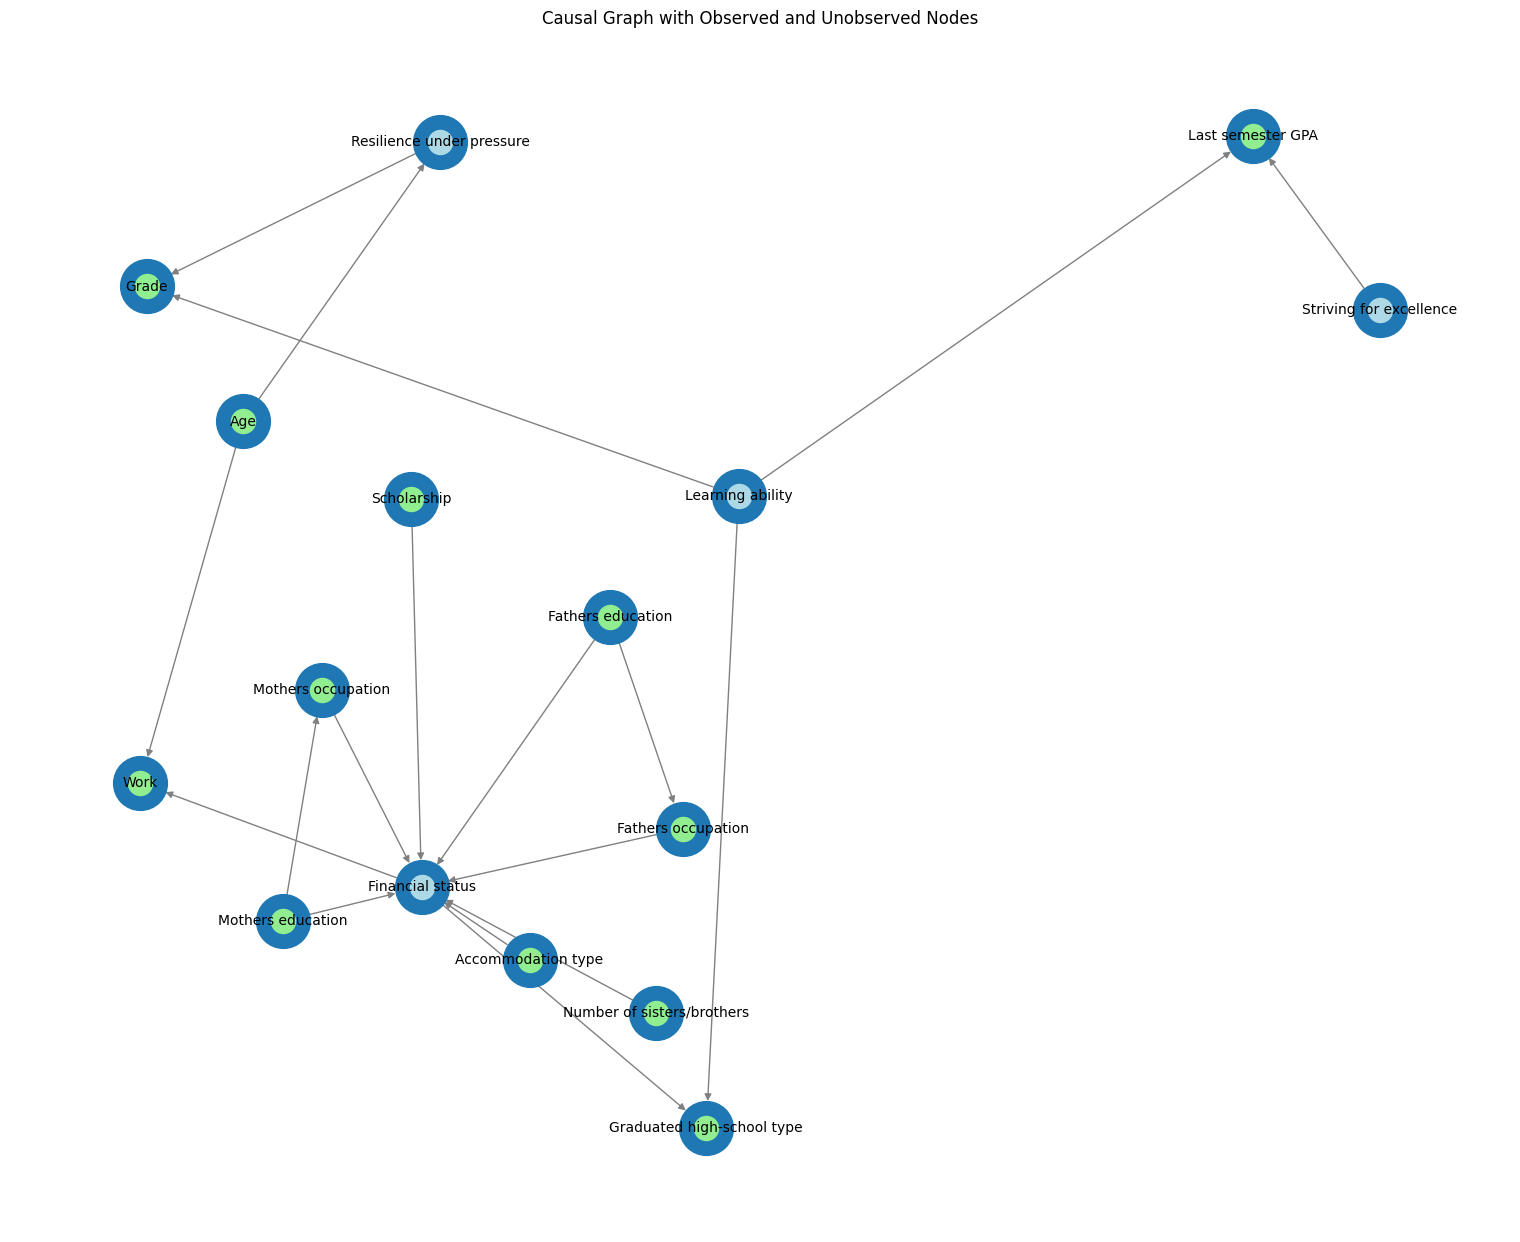

In [ ]:

# Create a directed graph
G = nx.DiGraph()

# Add nodes (green nodes are observed, blue nodes are unobserved)
observed_nodes = [
    'Number of sisters/brothers', 'Scholarship', 'Mothers occupation', 'Mothers education', 'Fathers occupation',
    'Fathers education',
    'Accommodation type',
    'Graduated high-school type', 'Last semester GPA', 'Age',
    'Work',
    # 'Attendance to classes', 'Listening in classes', 'Weekly study hours',
    'Grade'
]
unobserved_nodes = ['Financial status', 'Striving for excellence', 'Learning ability',
                    # 'Stress',
                    'Resilience under pressure']

# Add edges based on the relationships in the diagram
edges = [
    # Relationships with Financial Status
    ('Number of sisters/brothers', 'Financial status'), ('Scholarship', 'Financial status'),
    ('Mothers occupation', 'Financial status'), ('Mothers education', 'Financial status'),
    ('Fathers occupation', 'Financial status'), ('Fathers education', 'Financial status'),
    ('Accommodation type', 'Financial status'),('Mothers education', 'Mothers occupation'),
    ('Fathers education', 'Fathers occupation'),

    # Financial Status to other nodes
    ('Financial status', 'Graduated high-school type'),
    ('Financial status', 'Work'),

    # Connections with Striving for Excellence
    # ('Striving for excellence', 'Attendance to classes'),
    # ('Striving for excellence', 'Stress'),
    # ('Striving for excellence', 'Weekly study hours'),
     ('Striving for excellence', 'Last semester GPA'),

    # Connections with Learning Ability
    ('Learning ability','Graduated high-school type'), ('Learning ability','Last semester GPA'),
    ('Learning ability','Grade'),

    # Connections with Work and Age
    ('Age', 'Work'), ('Age', 'Resilience under pressure'),
    # ('Work', 'Stress'),
    # ('Stress', 'Grade'),
    # ('Stress', 'Resilience under pressure'),
    # ('Stress', 'Listening in classes'),
    # ('Work', 'Attendance to classes'), ('Work', 'Weekly study hours'),


    # Connections affecting Grade
    # ('Attendance to classes', 'Grade'), ('Listening in classes', 'Grade'),
    # ('Weekly study hours', 'Grade'),
    ('Learning ability', 'Grade'),('Resilience under pressure', 'Grade'),

    # Added missing connection
    ('Resilience under pressure', 'Grade'),
    #  ('Attendance to classes', 'Listening in classes'),
    # ('Accommodation type', 'Weekly study hours')
]

# Add nodes and edges to the graph
# G.add_nodes_from(observed_nodes + unobserved_nodes)
G.add_edges_from(edges)

# Improved layout visualization
plt.figure(figsize=(15, 12))
pos = nx.spring_layout(G, seed=15, k=0.7)  # k controls the spacing between nodes; higher value for more space
nx.draw(G, pos, with_labels=True, node_size=1500, font_size=10,  edge_color='gray')

# Color the nodes
nx.draw_networkx_nodes(G, pos, nodelist=observed_nodes, node_color='lightgreen')
nx.draw_networkx_nodes(G, pos, nodelist=unobserved_nodes, node_color='lightblue')

plt.title("Causal Graph with Observed and Unobserved Nodes")
plt.show()

In [ ]:
T = {'Work'}
y = {'Grade'}
z = nx.find_minimal_d_separator(G, T, y)
z

{'Age'}